
# **Task 1 : Data Cleaning and Preprocessing**


Description:
Handle missing values in the dataset.
Convert categorical variables into
numerical
representations using
techniques like one-hot encoding.


In [177]:
import pandas as pd

# LOAD THE DATASET
df = pd.read_csv('/content/drive/MyDrive/Telco_Customer_Churn_Dataset .csv')

STEP 1: INITIAL DATA INSPECTION

In [178]:
print("Shape of Dataset\n")
print(df.shape)

Shape of Dataset

(7043, 21)


In [179]:
print("First 5 rows of Dataset\n")
print(df.head())

First 5 rows of Dataset

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

In [180]:
print("Information of Dataset\n")
print(df.info())

Information of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [181]:
print("\nStatistical Description of Dataset\n")
print(df.describe())


Statistical Description of Dataset

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


STEP 2: CHECK MISSING VALUES

In [182]:
print("Missing Values in Each Column\n")
print(df.isnull().sum())

Missing Values in Each Column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [183]:
print("Total Missing Values in Dataset :",df.isnull().sum().sum())

Total Missing Values in Dataset : 0


STEP 3: IDENTIFY COLUMN TYPES

In [184]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

STEP 4: HANDLE MISSING VALUES

In [185]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

STEP 5: VERIFY MISSING VALUES AFTER CLEANING

In [186]:
print("\nMissing Values After Cleaning\n")
print(df.isnull().sum())


Missing Values After Cleaning

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


STEP 6: ENCODE CATEGORICAL VARIABLES

In [187]:
df_encoded = pd.get_dummies(df, drop_first=True)

STEP 7: FINAL DATASET CHECK

In [188]:
print("\nFinal Dataset Information (After Cleaning & Encoding)\n")
print(df_encoded.info())


Final Dataset Information (After Cleaning & Encoding)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 13602 entries, SeniorCitizen to Churn_Yes
dtypes: bool(13599), float64(1), int64(2)
memory usage: 91.5 MB
None


----

# **Tasks 2: Exploratory Data Analysis (EDA)**

**Description :**

* **Calculate and visualize the overall churn rate**
* **Explore customer distribution by various demographics** (e.g., gender, age, senior citizen status, partner, dependents)
* **Analyze tenure distribution** (e.g., number of months a customer has been with the company)
* **Investigate relationships between churn and different contract types/payment methods** (e.g., month-to-month, one-year, two-year contracts; credit card, bank transfer, electronic check)

In [189]:
import matplotlib.pyplot as plt

STEP 1 : OVERALL CHURN RATE

In [190]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Overall Churn Rate (%)")
print(churn_rate)

Overall Churn Rate (%)
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


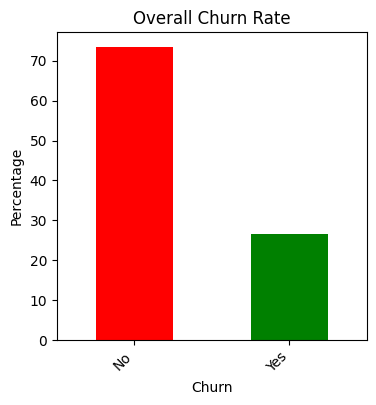

In [191]:
plt.figure(figsize=(4, 4))
churn_rate.plot(kind='bar',color=['red', 'green'])
plt.xticks(rotation=45, ha='right')
plt.title("Overall Churn Rate")
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.show()


STEP 2 : CUSTOMER DISTRIBUTION BY DEMOGRAPHICS

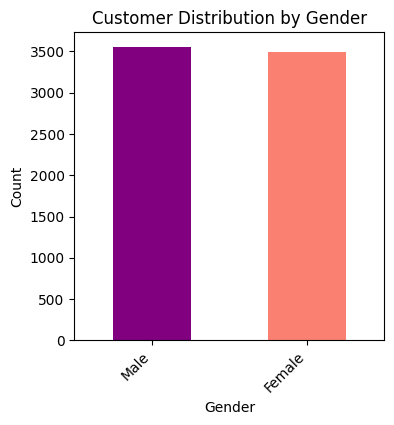

In [192]:
# Gender distribution
plt.figure(figsize=(4, 4))
df['gender'].value_counts().plot(kind='bar',color=['purple', 'salmon'])
plt.title("Customer Distribution by Gender")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

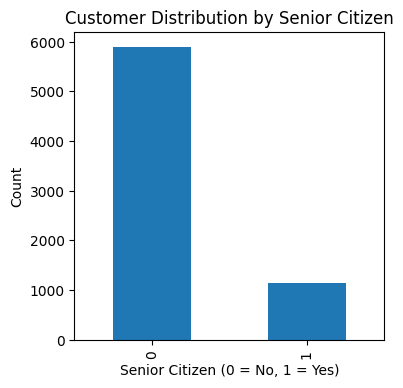

In [193]:
# Senior Citizen distribution
plt.figure(figsize=(4, 4))
df['SeniorCitizen'].value_counts().plot(kind='bar')
plt.title("Customer Distribution by Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

STEP 3 : TENURE DISTRIBUTION

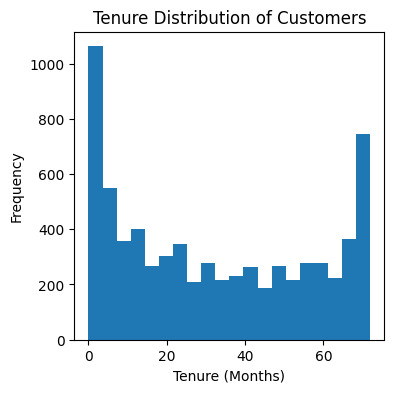

In [194]:
plt.figure(figsize=(4, 4))
df['tenure'].plot(kind='hist', bins=20)
plt.title("Tenure Distribution of Customers")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

STEP 4 : CHURN VS CONTRACT TYPE

In [195]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print("\nChurn Percentage by Contract Type\n")
print(contract_churn)


Churn Percentage by Contract Type

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


<Figure size 400x400 with 0 Axes>

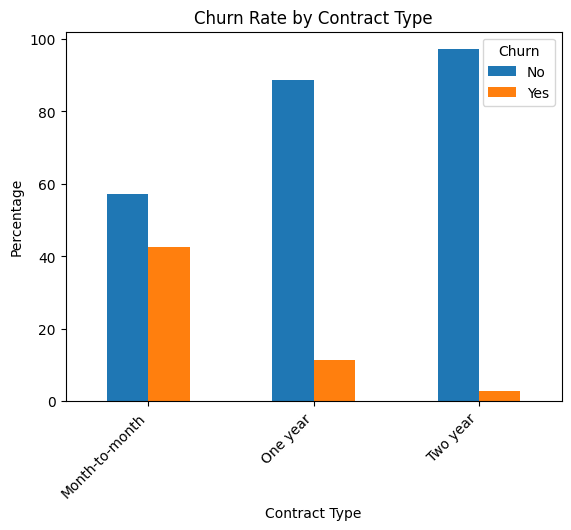

In [196]:
plt.figure(figsize=(4, 4))
contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Contract Type")
plt.ylabel("Percentage")
plt.show()

STEP 5 : CHURN VS PAYMENT METHOD

In [197]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print("\nChurn Percentage by Payment Method\n")
print(payment_churn)


Churn Percentage by Payment Method

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


<Figure size 400x400 with 0 Axes>

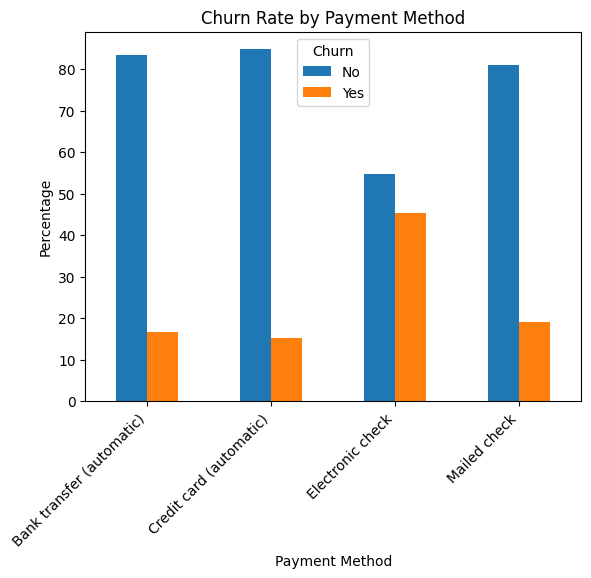

In [198]:
plt.figure(figsize=(4, 4))
payment_churn.plot(kind='bar')
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Payment Method")
plt.ylabel("Percentage")
plt.show()

### ✅ Key Insights from EDA

1. **Churn Rate:** About **26.5%** of customers have churned, indicating a notable customer loss.

2. **Demographics:** Customer distribution by **gender is balanced**, and most customers are **non-senior citizens**.

3. **Tenure:** Customers with **shorter tenure** are more likely to churn, while long-term customers show higher retention.

4. **Contract Type:** **Month-to-month contracts** have the highest churn, whereas **one-year and two-year contracts** show much lower churn.

5. **Payment Method:** Customers using **electronic checks** have the highest churn, while **automatic payment methods** have lower churn.


# **Tasks 3: Customer Segmentation**

**Description:**

* Segment customers based on tenure,
monthly charges, and contract type.
* Analyze churn rates across these
segments

STEP 1 : Create Tenure Segments

In [233]:
# Segment customers based on tenure
df['Tenure_Segment'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12 months', '13-24 months', '25-48 months', '49-72 months']
)

STEP 2 : Create Monthly Charges Segments

In [200]:
# Segment customers based on monthly charges
df['Charges_Segment'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 35, 70, 120],
    labels=['Low', 'Medium', 'High']
)

STEP 3 : Churn Rate by Tenure Segment

In [201]:
# Churn rate by tenure segment
tenure_churn = pd.crosstab(
    df['Tenure_Segment'],
    df['Churn'],
    normalize='index'
) * 100

print("Churn Rate by Tenure Segment (%)")
tenure_churn


Churn Rate by Tenure Segment (%)


Churn,No,Yes
Tenure_Segment,,
0-12 months,52.321839,47.678161
13-24 months,71.289062,28.710938
25-48 months,79.611041,20.388959
49-72 months,90.486824,9.513176


<Figure size 400x400 with 0 Axes>

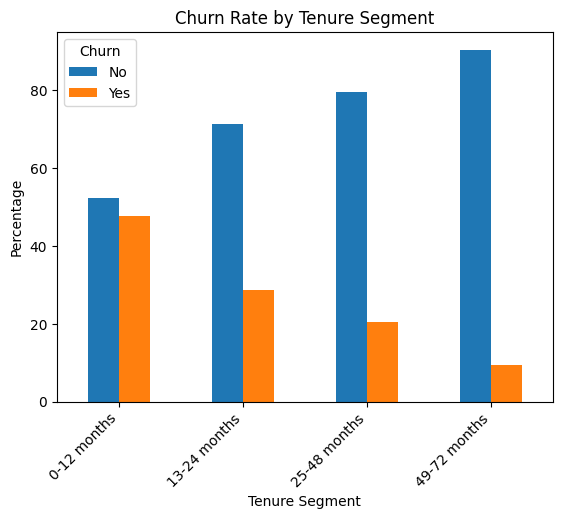

In [202]:
# Visualize churn by tenure segment
plt.figure(figsize=(4, 4))
tenure_churn.plot(kind='bar')
plt.title("Churn Rate by Tenure Segment")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Tenure Segment")
plt.ylabel("Percentage")
plt.show()


STEP 4 : Churn Rate by Monthly Charges Segment

In [203]:
# Churn rate by monthly charges segment
charges_churn = pd.crosstab(
    df['Charges_Segment'],
    df['Churn'],
    normalize='index'
) * 100

print("Churn Rate by Monthly Charges Segment (%)")
charges_churn


Churn Rate by Monthly Charges Segment (%)


Churn,No,Yes
Charges_Segment,,
Low,89.106628,10.893372
Medium,76.057971,23.942029
High,64.638571,35.361429


<Figure size 400x400 with 0 Axes>

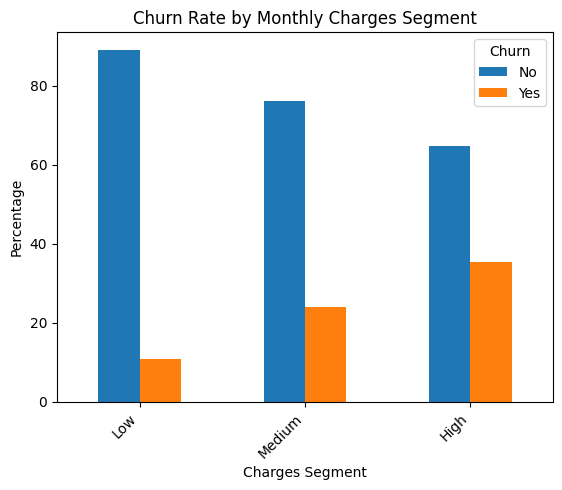

In [204]:
# Visualize churn by monthly charges segment
plt.figure(figsize=(4, 4))
charges_churn.plot(kind='bar')
plt.title("Churn Rate by Monthly Charges Segment")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Charges Segment")
plt.ylabel("Percentage")
plt.show()

STEP 5 : Churn Rate by Contract Type

In [205]:
# Churn rate by contract type
contract_churn = pd.crosstab(
    df['Contract'],
    df['Churn'],
    normalize='index'
) * 100

print("Churn Rate by Contract Type (%)")
contract_churn

Churn Rate by Contract Type (%)


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


<Figure size 400x400 with 0 Axes>

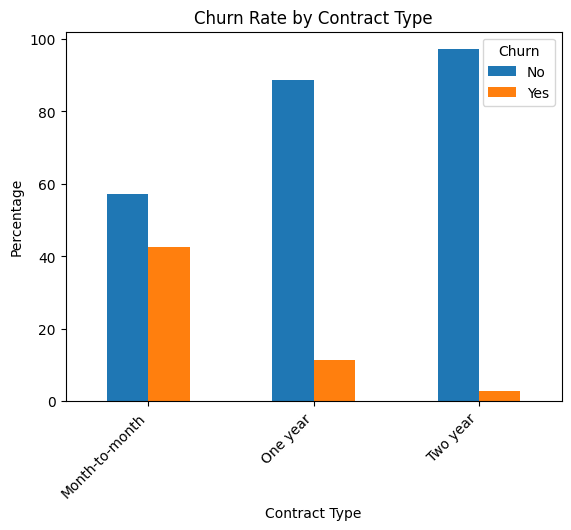

In [206]:
# Visualize churn by contract type
plt.figure(figsize=(4, 4))
contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Contract Type")
plt.ylabel("Percentage")
plt.show()

**Interpretations**:
* Customers with **short tenure** and **high monthly charges** have a **higher churn rate**.
* Customers on **month-to-month contracts** are the **most likely to churn**.
* Customers with **long tenure** and **long-term contracts** (one-year or two-year) show **higher loyalty and lower churn**.


# **TASK 4 : Churn Prediction Mode**

**Descriptions :**
* Develop a churn prediction model using
machine learning algorithms like logistic
regression.
* Evaluate the model's performance using
appropriate metrics.

STEP 1 : Import Libraries

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

STEP 2 : Prepare Dataset

In [208]:
# Convert target variable (Churn) to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

STEP 3 : Split Features and Target

In [209]:
# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

STEP 4 : Train-Test Split

In [210]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STEP 5 : Train Logistic Regression Model

In [211]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

STEP 6 : Make Predictions


In [212]:
# Predict on test data
y_pred = model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


STEP 7 : Model Evaluation Metrics

In [213]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7913413768630234
Precision: 0.6253968253968254
Recall: 0.5281501340482574

Confusion Matrix:

[[918 118]
 [176 197]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



# **TASK 5: Customer Retention Strategies**

**Description :**
* Propose data-driven strategies to reduce churn.
* Identify key factors influencing churn and suggest actions.
* Calculate the lifetime value (LTV) of customers.
* Identify high-value customers at risk of churning.

STEP 1 : Convert Churn to binary

In [214]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

STEP 2 : Churn by contract type

In [215]:
# Churn by contract type
churn_by_contract = df.groupby('Contract')['Churn'].mean()
churn_by_contract


,Churn
Contract,
Month-to-month,NaN
One year,NaN
Two year,NaN


STEP 3 : Churn by Tenure Group

In [216]:
# Tenure segmentation
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49+']
)

# Group by tenure and calculate churn rate
churn_by_tenure = df.groupby('TenureGroup', observed=False)['Churn'].mean()
churn_by_tenure

,Churn
TenureGroup,
0-12,NaN
13-24,NaN
25-48,NaN
49+,NaN


STEP 4 : Churn by Monthly Charges

In [217]:
# Monthly charges segmentation
df['ChargeGroup'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])
churn_by_charges = df.groupby('ChargeGroup',observed=False)['Churn'].mean()
churn_by_charges

,Churn
ChargeGroup,
Low,NaN
Medium,NaN
High,NaN


STEP 5 : Calculate Customer Lifetime Value (LTV)

In [235]:
# Customer Lifetime Value (LTV)
df['LTV'] = df['MonthlyCharges'] * df['tenure']

# Identify high-value customers
ltv_median = df['LTV'].median()
high_value_customers = df[df['LTV'] > ltv_median]

print("Number of High-Value Customers at Risk:", high_value_at_risk.shape[0])

Number of High-Value Customers at Risk: 661


# **TASK 6 : Visualizations**

**Description :**
* Create various visualizations for deeper insights (e.g., box plots, violin plots, pair plots).

STEP 1 : Import Libraries for visualizations

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

STEP 2 : initail

In [220]:
# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert numeric columns safely
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing numeric values
df = df.dropna(subset=['MonthlyCharges', 'tenure', 'TotalCharges'])

# Create categorical churn label
df['Churn_Label'] = df['Churn'].map({0: 'No Churn', 1: 'Churn'})
df['Churn_Label'] = df['Churn_Label'].astype('category')

STEP 3 : Box Plot

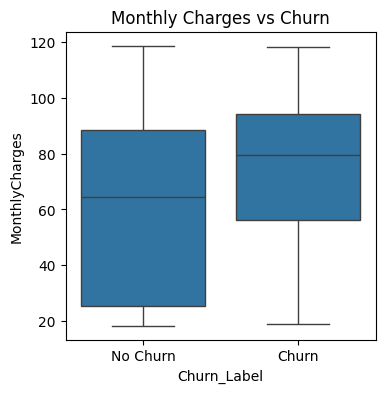

In [225]:
# Ensure only the intended categories exist
df_plot = df[df['Churn_Label'].isin(['No Churn', 'Churn'])].copy()

plt.figure(figsize=(4,4))
sns.boxplot(
    x='Churn_Label',
    y='MonthlyCharges',
    data=df_plot,
    order=['No Churn', 'Churn']
)
plt.title('Monthly Charges vs Churn')
plt.show()

STEP 4 : Violin Plot

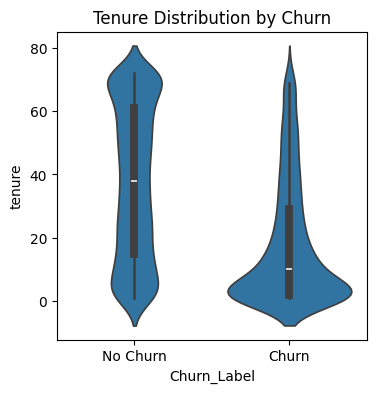

In [227]:
plt.figure(figsize=(4,4))
sns.violinplot(
    x='Churn_Label',
    y='tenure',
    data=df,
    order=['No Churn', 'Churn']
)
plt.title('Tenure Distribution by Churn')
plt.show()

STEP 5 : Box Plot

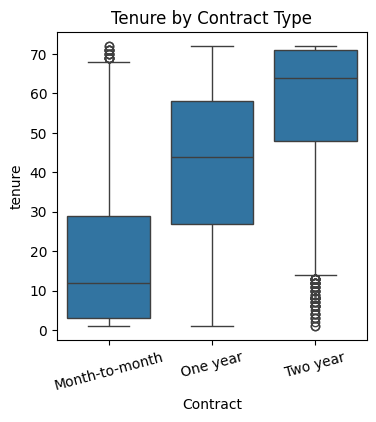

In [229]:
plt.figure(figsize=(4,4))
sns.boxplot(
    x='Contract',
    y='tenure',
    data=df
)
plt.title('Tenure by Contract Type')
plt.xticks(rotation=15)
plt.show()

STEP 6 : Pair Plot

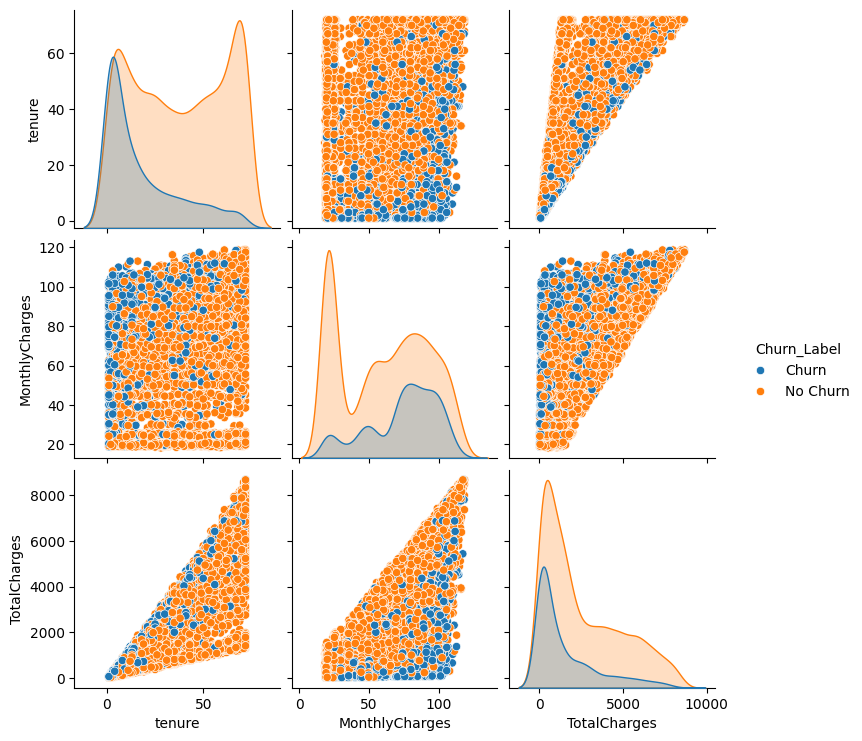

In [230]:
sns.pairplot(
    df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Label']],
    hue='Churn_Label',
    diag_kind='kde'
)
plt.show()

STEP 7 : Correlation Heatmap

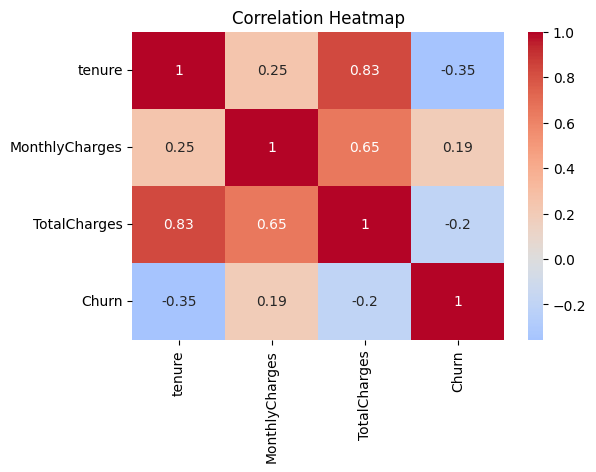

In [232]:
plt.figure(figsize=(6,4))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()